# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

639

In [3]:
cities

['bubaque',
 'egvekinot',
 'kloulklubed',
 'rikitea',
 'ushuaia',
 'ancud',
 'busselton',
 'san fernando',
 'butaritari',
 'kologriv',
 'haines junction',
 'murindo',
 'illoqqortoormiut',
 'puerto del rosario',
 'katsuura',
 'belushya guba',
 'nhulunbuy',
 'korla',
 'souillac',
 'hermanus',
 'barrow',
 'punta arenas',
 'khatanga',
 'vaitupu',
 'porto novo',
 'apatou',
 'georgetown',
 'esperance',
 'hobart',
 'vale da amoreira',
 'ribeira grande',
 'sioux lookout',
 'pevek',
 'cabo san lucas',
 'asayita',
 'albany',
 'saint-philippe',
 'spisska nova ves',
 'phonhong',
 'sentyabrskiy',
 'severnyy',
 'jabiru',
 'port lincoln',
 'bernburg',
 'touros',
 'sao filipe',
 'kamiiso',
 'grand river south east',
 'cape town',
 'constitucion',
 'innisfail',
 'marzuq',
 'tsevie',
 'mys shmidta',
 'raga',
 'nikolskoye',
 'iwanai',
 'bluff',
 'luderitz',
 'zheleznogorsk-ilimskiy',
 'cidreira',
 'atuona',
 'puerto ayora',
 'harnosand',
 'kavieng',
 'port alfred',
 'ogulin',
 'leningradskiy',
 'new norf

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Set lists
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Base url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Counters
record_counter = 1
set_counter = 1

print(f"Beginning Data Retrieval")
print(f"-----------------------------")

# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Loop through the list of cities
for city in cities:
    
    # Conditional for record_counter
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0
    
    # Try request and Append lists
    try:
        response = requests.get(query_url + city).json()
        print(f"Processing Record {record_counter} of Set {set_counter} | {city}")
        
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
    except:
        print(f"City not found. Skipping...")
        pass
    
print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 2 of Set 1 | bubaque
Processing Record 3 of Set 1 | egvekinot
Processing Record 4 of Set 1 | kloulklubed
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | ancud
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | san fernando
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | kologriv
Processing Record 12 of Set 1 | haines junction
Processing Record 13 of Set 1 | murindo
Processing Record 14 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 15 of Set 1 | puerto del rosario
Processing Record 16 of Set 1 | katsuura
Processing Record 17 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 18 of Set 1 | nhulunbuy
Processing Record 19 of Set 1 | korla
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of Set 1 | barrow
Proces

Processing Record 34 of Set 4 | mahebourg
Processing Record 35 of Set 4 | anadyr
Processing Record 36 of Set 4 | tabiauea
City not found. Skipping...
Processing Record 37 of Set 4 | pangnirtung
Processing Record 38 of Set 4 | kisangani
Processing Record 39 of Set 4 | effium
Processing Record 40 of Set 4 | obzor
Processing Record 41 of Set 4 | manokwari
Processing Record 42 of Set 4 | araouane
Processing Record 43 of Set 4 | abomsa
Processing Record 44 of Set 4 | pokrovskoye
Processing Record 45 of Set 4 | danjiangkou
Processing Record 46 of Set 4 | naze
Processing Record 47 of Set 4 | andenes
Processing Record 48 of Set 4 | rio grande
Processing Record 49 of Set 4 | tbilisi
Processing Record 50 of Set 4 | mogocha
Processing Record 0 of Set 5 | deputatskiy
Processing Record 1 of Set 5 | east london
Processing Record 2 of Set 5 | dingle
Processing Record 3 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 4 of Set 5 | dekoa
City not found. Skipping...
Processing Record 5 

Processing Record 21 of Set 8 | bima
Processing Record 22 of Set 8 | general roca
Processing Record 23 of Set 8 | saint-augustin
Processing Record 24 of Set 8 | saint-pierre
Processing Record 25 of Set 8 | samarai
Processing Record 26 of Set 8 | kruisfontein
Processing Record 27 of Set 8 | portland
Processing Record 28 of Set 8 | manacor
Processing Record 29 of Set 8 | oriximina
Processing Record 30 of Set 8 | hovd
Processing Record 31 of Set 8 | neiafu
Processing Record 32 of Set 8 | kitami
Processing Record 33 of Set 8 | liverpool
Processing Record 34 of Set 8 | kailua
Processing Record 35 of Set 8 | sao raimundo das mangabeiras
Processing Record 36 of Set 8 | tessalit
Processing Record 37 of Set 8 | nabire
Processing Record 38 of Set 8 | karasburg
Processing Record 39 of Set 8 | rungata
City not found. Skipping...
Processing Record 40 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 41 of Set 8 | soroca
Processing Record 42 of Set 8 | cuamba
Processing Record 43 of S

Processing Record 7 of Set 12 | dikson
Processing Record 8 of Set 12 | arlit
Processing Record 9 of Set 12 | moose factory
Processing Record 10 of Set 12 | avarua
Processing Record 11 of Set 12 | melito di porto salvo
Processing Record 12 of Set 12 | kayankulam
Processing Record 13 of Set 12 | slawno
Processing Record 14 of Set 12 | iracoubo
Processing Record 15 of Set 12 | havelock
Processing Record 16 of Set 12 | rzhyshchiv
Processing Record 17 of Set 12 | doctor pedro p. pena
City not found. Skipping...
Processing Record 18 of Set 12 | kimbe
Processing Record 19 of Set 12 | vryburg
Processing Record 20 of Set 12 | republic
Processing Record 21 of Set 12 | port hardy
Processing Record 22 of Set 12 | puerto ayacucho
Processing Record 23 of Set 12 | redlands
Processing Record 24 of Set 12 | ballymena
Processing Record 25 of Set 12 | bilma
Processing Record 26 of Set 12 | sulangan
Processing Record 27 of Set 12 | ruatoria
City not found. Skipping...
Processing Record 28 of Set 12 | magh

In [5]:
pprint(requests.get(f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q=atar").json())

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 20.52, 'lon': -13.05},
 'dt': 1603042308,
 'id': 2381334,
 'main': {'feels_like': 90.37,
          'grnd_level': 987,
          'humidity': 17,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 97.27,
          'temp_max': 97.27,
          'temp_min': 97.27},
 'name': 'Atar',
 'sys': {'country': 'MR', 'sunrise': 1603003699, 'sunset': 1603045554},
 'timezone': 0,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 15, 'speed': 10.22}}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Create a Weather DataFrame
weather_df = pd.DataFrame({
     "City": city_name,
     "Lat": lat,
     "Lng": lng,
     "Max Temp": max_temp,
     "Humidity": humidity,
     "Cloudiness": cloudiness,
     "Wind Speed": wind_speed,
     "Country": country,
     "Date": date})

weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bubaque,11.28,-15.83,83.12,80,2,9.51,GW,1603042061
1,Egvekinot,66.32,-179.17,24.01,88,95,6.29,RU,1603042062
2,Kloulklubed,7.04,134.26,82.40,78,75,9.17,PW,1603042062
3,Rikitea,-23.12,-134.97,74.82,79,74,21.23,PF,1603042062
4,Ushuaia,-54.80,-68.30,46.40,71,40,18.34,AR,1603042062
...,...,...,...,...,...,...,...,...,...
578,Kantang,7.41,99.52,78.66,86,100,2.93,TH,1603042168
579,Cherdyn',60.40,56.48,31.87,98,100,9.10,RU,1603042168
580,Berlevåg,70.86,29.09,30.20,100,20,2.24,NO,1603042168
581,Mahdalynivka,48.92,34.92,48.20,81,32,8.95,UA,1603042168


In [9]:
# Export data to a CSV file
weather_df.to_csv("output_data/weather.csv",
                  encoding="utf-8", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#  Get the indices of cities that have humidity over 100%.
weather_df.loc[weather_df["Humidity"] > 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

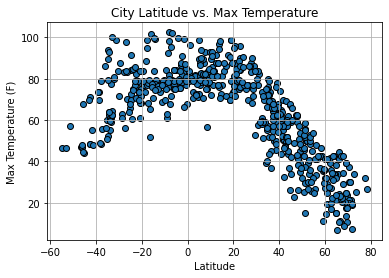

In [13]:
# Create a scatter plot for Lat vs Max Temp
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o", edgecolor="black")

# Set Title and Labels
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/CityLatvsTemp.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

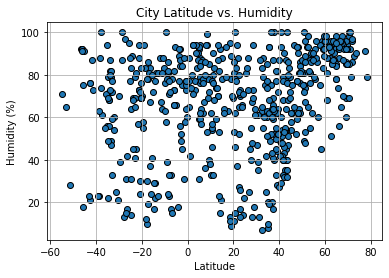

In [14]:
# Create a scatter plot for Lat vs Humidity
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", edgecolor = "black")

# Set Title and Labels
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/CityLatvsHumidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

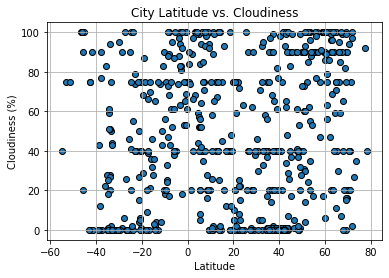

In [15]:
# Create a scatter plot for Lat vs Cloudiness
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", edgecolor = "black")

# Set Title and Labels
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/CityLatvsCloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

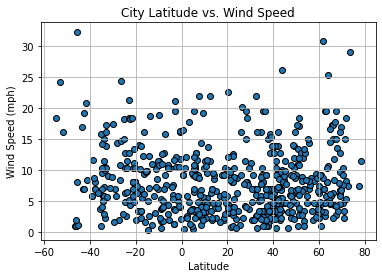

In [16]:
# Creat a scatter plot for Lat vs Wind Speed
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", edgecolor = "black")

# Set Title and Labels
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/CityLatvsWindSpeed.png")

# Show plot
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression